In [1]:
import _3dTo2dSetup as D3
import numpy as np
from lineRenderAlgo import Bresenham3D
import math

In [2]:
SRC_TO_DETECTOR = 1167
SRC_TO_PATIENT = 705
DETECTOR_TO_PATIENT = SRC_TO_DETECTOR - SRC_TO_PATIENT
# used to determine box dimensions for projections
#MAG_FACTOR = SRC_TO_DETECTOR/SRC_TO_PATIENT
IMAGE_DIM = 735  # scale image dim down 1 to get centered image (since uneven)
#BOX_DIM = math.ceil(IMAGE_DIM/MAG_FACTOR)  # ~ 445
HALF_IMAGE_DIM = int((IMAGE_DIM - 1) / 2)


In [3]:
#steps 2 day

# 1 - create points 2 loop through and an image coresponding to said points
# 2 - preform bresenham between image and "forsviningspunkt"
# 3 - check if any points along said line are colored then color image repeat 2
# 4 - save image in folder to be used later


In [4]:
#create image with corrds
img_coords = np.empty([IMAGE_DIM,IMAGE_DIM],dtype=object)

for x in range(IMAGE_DIM):
  for y in range(IMAGE_DIM):
    img_coords[x,y] = (HALF_IMAGE_DIM-x, HALF_IMAGE_DIM-y)



In [5]:
test = np.zeros([5,5])
test[0,0] = 1
test[2,2] = 3
for i in img_coords[:5,:5]:
  print(i)
  #print(i[0],i[1])

[(367, 367) (367, 366) (367, 365) (367, 364) (367, 363)]
[(366, 367) (366, 366) (366, 365) (366, 364) (366, 363)]
[(365, 367) (365, 366) (365, 365) (365, 364) (365, 363)]
[(364, 367) (364, 366) (364, 365) (364, 364) (364, 363)]
[(363, 367) (363, 366) (363, 365) (363, 364) (363, 363)]


In [21]:
path = r"3dTo2d\solid_400001.nrrd"
box = D3.get3dFigure(445,path)

In [16]:
box.shape

(445, 445, 445)

In [27]:
#preform bresenham -> locate box -> check if points in box are colored
d_to_p, s_to_p, box_dim = DETECTOR_TO_PATIENT,SRC_TO_PATIENT,445

#box = np.zeros([IMAGE_DIM, IMAGE_DIM,IMAGE_DIM])
img = np.zeros([IMAGE_DIM,IMAGE_DIM])


#loop all image coords
for x in range(IMAGE_DIM-IMAGE_DIM+1):
  for y in range(IMAGE_DIM-IMAGE_DIM+1):
    #create line of points
    points = Bresenham3D(-d_to_p, 0, 0, s_to_p,img_coords[x, y][0], img_coords[x, y][1])
    #get points within box
    points_in_box = D3.getPointsInBox(points,box_dim)
    #check if any points in box are colord/a figure
    print(points)
    print("-.-----")
    print(points_in_box)
    for i in points_in_box:
      #convert real coord to box coord
      xb = i[0] + HALF_IMAGE_DIM -1 
      yb = i[1] + HALF_IMAGE_DIM -1
      zb = i[2] + HALF_IMAGE_DIM -1
      if (box[xb,yb,zb] == 1):
        #if point found just go next
        img[x,y] = 1
        print("placed")
        break
  print("done wiht;", x)

    


[(-462, 0, 0), (-461, 0, 0), (-460, 1, 1), (-459, 1, 1), (-458, 1, 1), (-457, 2, 2), (-456, 2, 2), (-455, 2, 2), (-454, 3, 3), (-453, 3, 3), (-452, 3, 3), (-451, 3, 3), (-450, 4, 4), (-449, 4, 4), (-448, 4, 4), (-447, 5, 5), (-446, 5, 5), (-445, 5, 5), (-444, 6, 6), (-443, 6, 6), (-442, 6, 6), (-441, 7, 7), (-440, 7, 7), (-439, 7, 7), (-438, 8, 8), (-437, 8, 8), (-436, 8, 8), (-435, 8, 8), (-434, 9, 9), (-433, 9, 9), (-432, 9, 9), (-431, 10, 10), (-430, 10, 10), (-429, 10, 10), (-428, 11, 11), (-427, 11, 11), (-426, 11, 11), (-425, 12, 12), (-424, 12, 12), (-423, 12, 12), (-422, 13, 13), (-421, 13, 13), (-420, 13, 13), (-419, 14, 14), (-418, 14, 14), (-417, 14, 14), (-416, 14, 14), (-415, 15, 15), (-414, 15, 15), (-413, 15, 15), (-412, 16, 16), (-411, 16, 16), (-410, 16, 16), (-409, 17, 17), (-408, 17, 17), (-407, 17, 17), (-406, 18, 18), (-405, 18, 18), (-404, 18, 18), (-403, 19, 19), (-402, 19, 19), (-401, 19, 19), (-400, 19, 19), (-399, 20, 20), (-398, 20, 20), (-397, 20, 20), (-396

IndexError: index 445 is out of bounds for axis 1 with size 445

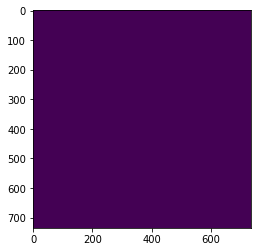

In [23]:
import matplotlib.pyplot as plt

#plt.imshow(box[100],cmap="gray")
plt.imshow(img)
plt.show()